In [1]:
from lsh import *
from utils import *
from query import *

%load_ext autoreload
%autoreload 2

In [2]:
PATH_IMGS     = "imnet-val/val/"
FILE_FEATURES = "imnet-val/cnn-50000.p"
FNAME_OFFSET  = 48 #prefix of stored file names to chop off
IMSIZE        = (224, 224)

data = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)
N_data = data.X.shape[1]

PATH_IMGS     = "imnet-test-1000/imgs/"
FILE_FEATURES = "imnet-test-1000/cnn-1000.p"
FNAME_OFFSET  = 23 #prefix of stored file names to chop off
IMSIZE        = (224, 224)
queries = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)

# Vary all

In [32]:
N_queries = 50

Ls = [0, 1, 2, 4, 8, 16, 32] #number of neighbors to make candidates
bs = [200] #hash bits
es = [10, 6, 3.8, 2.9, 2.7, 2.4, 2.2] #error tolerance

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 50000, 50
Ls, [0, 1, 2, 4, 8, 16, 32]
bs, [200]
es, [10, 6, 3.8, 2.9, 2.7, 2.4, 2.2]
Ms, [5, 9, 19, 32, 37, 48, 59]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,   200,  10.0,     5,     0,    0.322,    0.438
     0,      0,      1,   200,  10.0,     5,     1,    0.301,    0.732
     0,      0,      2,   200,  10.0,     5,     2,    0.316,    0.768
     0,      0,      3,   200,  10.0,     5,     4,    0.352,    0.806
     0,      0,      4,   200,  10.0,     5,     8,    0.411,    0.843
     0,      0,      5,   200,  10.0,     5,    16,    0.592,    0.870
     0,      0,      6,   200,  10.0,     5,    32,    1.131,    0.894
     0,      1,      0,   200,   6.0,     9,     0,    0.420,    0.628
     0,      1,      1,   200,   6.0,     9,     1,    0.425,    0.779
     0,      1,      2,   200,   6.0,     9,     2,    0.465,    0.813
     0,      1,      3,   200,   6.0,     9,     4,    0.511,    0.844
     0,      

Optimal points
  b,   e,  M,  L,    t,  ndgc
200,10.0,  5,  0, 0.00, 0.000
200,10.0,  5,  2, 0.30, 0.732
200,10.0,  5,  4, 0.32, 0.768
200, 6.0,  9,  0, 1.13, 0.894
200, 6.0,  9,  1, 0.42, 0.628
200, 6.0,  9,  8, 0.51, 0.844
200, 6.0,  9, 32, 1.10, 0.895
200, 2.9, 32,  0, 3.73, 0.959
200, 2.9, 32,  1, 1.05, 0.807
200, 2.9, 32,  2, 1.04, 0.873
200, 2.9, 32, 16, 2.29, 0.945
200, 2.7, 37,  4, 1.29, 0.901
200, 2.7, 37,  8, 1.63, 0.929
200, 2.7, 37, 16, 2.71, 0.947
200, 2.4, 48,  0, 6.67, 0.975
200, 2.4, 48,  1, 1.47, 0.837
200, 2.4, 48,  4, 1.71, 0.922
200, 2.2, 59,  0, 8.66, 0.979
200, 2.2, 59,  1, 1.76, 0.843
200, 2.2, 59,  2, 1.78, 0.911
200, 2.2, 59,  8, 2.41, 0.948
200, 2.2, 59, 16, 3.15, 0.964


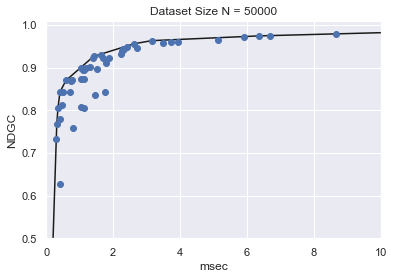

In [33]:
# axlims = [0, 40, 0.5, 1.01]
axlims = [0, 10, 0.5, 1.01]
idxs = plot_search(results, N_data, N_queries, axlims)

# Vary b

In [19]:
N_queries = 10

bs = range(5, 250, 20)
es = [4, 2] #error tolerance
Ls = [1, 6] #number of neighbors to make candidates

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 50000, 10
Ls, [1, 6]
bs, range(5, 250, 20)
es, [4, 2]
Ms, [17, 74]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,     5,   4.0,    17,     1,    0.571,    0.704
     0,      0,      1,     5,   4.0,    17,     6,    0.782,    0.781
     0,      1,      0,     5,   2.0,    74,     1,    1.939,    0.757
     0,      1,      1,     5,   2.0,    74,     6,    3.916,    0.821
     1,      0,      0,    25,   4.0,    17,     1,    0.566,    0.747
     1,      0,      1,    25,   4.0,    17,     6,    0.825,    0.816
     1,      1,      0,    25,   2.0,    74,     1,    3.778,    0.820
     1,      1,      1,    25,   2.0,    74,     6,    3.685,    0.907
     2,      0,      0,    45,   4.0,    17,     1,    1.176,    0.799
     2,      0,      1,    45,   4.0,    17,     6,    0.825,    0.867
     2,      1,      0,    45,   2.0,    74,     1,    1.986,    0.882
     2,      1,      1,    45,   2.0,    74,     6,    3.979, 

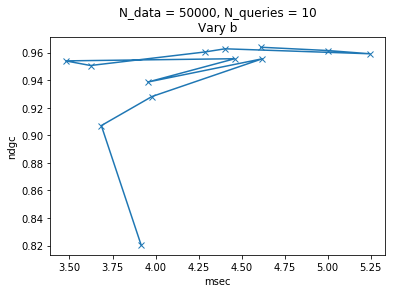

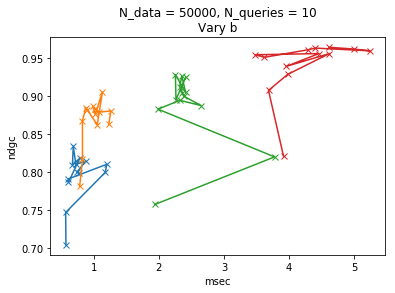

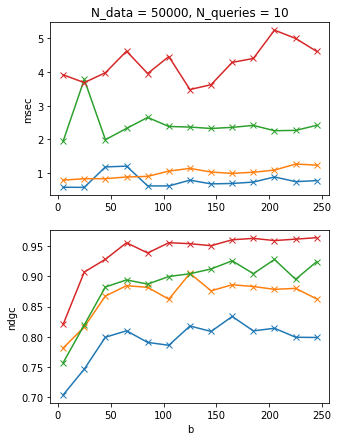

In [20]:
plot_param_search(results, 0, N_data, N_queries)

# Vary eps

In [13]:
N_queries = 200

bs = [200]
es = [9, 4, 2.7, 2.2, 1.9, 1.7, 1.5]
Ls = [1, 6] #number of neighbors to make candidates

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 50000, 10
Ls, [1, 6]
bs, [200]
es, [9, 4, 2.7, 2.2, 1.9, 1.7, 1.5]
Ms, [6, 17, 37, 59, 83, 110, 152]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,   200,   9.0,     6,     1,    0.363,    0.728
     0,      0,      1,   200,   9.0,     6,     6,    0.523,    0.804
     0,      1,      0,   200,   4.0,    17,     1,    0.743,    0.813
     0,      1,      1,   200,   4.0,    17,     6,    1.232,    0.895
     0,      2,      0,   200,   2.7,    37,     1,    1.190,    0.871
     0,      2,      1,   200,   2.7,    37,     6,    2.416,    0.937
     0,      3,      0,   200,   2.2,    59,     1,    1.910,    0.909
     0,      3,      1,   200,   2.2,    59,     6,    3.872,    0.949
     0,      4,      0,   200,   1.9,    83,     1,    3.176,    0.911
     0,      4,      1,   200,   1.9,    83,     6,    4.716,    0.964
     0,      5,      0,   200,   1.7,   110,     1,    3.712,    0.928
     0,      5,      1,   20

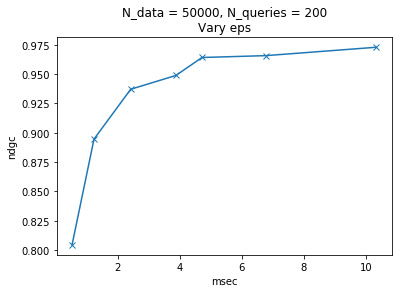

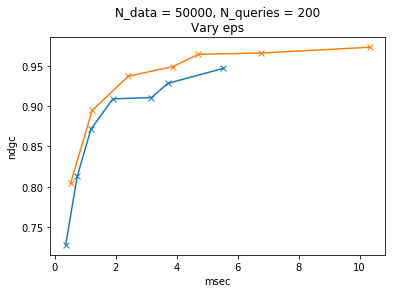

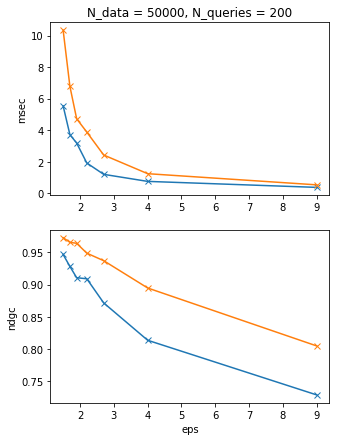

In [14]:
plot_param_search(results, 1, N_data, N_queries)

# Vary L

In [15]:
N_queries = 200

bs = [200]
es = [4, 2] #error tolerance
Ls = range(0, 20, 1) #number of neighbors to make candidates

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 50000, 10
Ls, range(0, 20)
bs, [200]
es, [4, 2]
Ms, [17, 74]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,   200,   4.0,    17,     0,    0.668,    0.692
     0,      0,      1,   200,   4.0,    17,     1,    0.897,    0.794
     0,      0,      2,   200,   4.0,    17,     2,    0.796,    0.822
     0,      0,      3,   200,   4.0,    17,     3,    0.999,    0.847
     0,      0,      4,   200,   4.0,    17,     4,    0.923,    0.863
     0,      0,      5,   200,   4.0,    17,     5,    1.153,    0.870
     0,      0,      6,   200,   4.0,    17,     6,    1.077,    0.876
     0,      0,      7,   200,   4.0,    17,     7,    1.153,    0.879
     0,      0,      8,   200,   4.0,    17,     8,    1.200,    0.886
     0,      0,      9,   200,   4.0,    17,     9,    1.490,    0.888
     0,      0,     10,   200,   4.0,    17,    10,    1.622,    0.889
     0,      0,     11,   200,   4.0,    17,    11,    1.775,    0.8

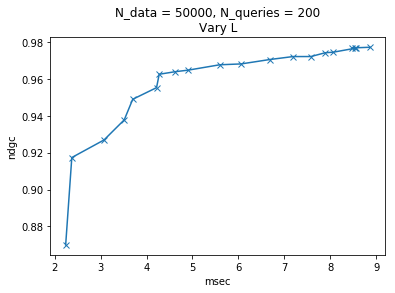

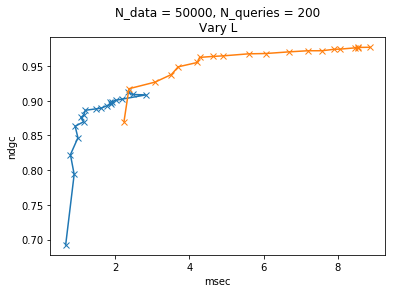

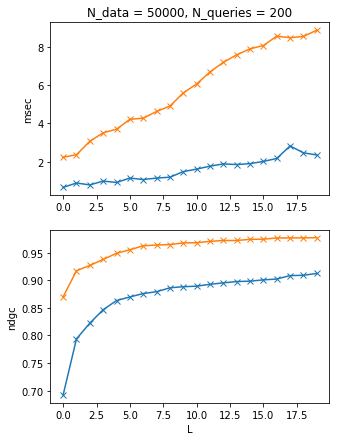

In [16]:
plot_param_search(results, 2, N_data, N_queries)